### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [44]:
Vehicle_df= pd.read_csv("vehicle.csv")
Vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [45]:
Vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [46]:
Veh_df= Vehicle_df.dropna()

In [47]:
Veh_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [48]:
Veh_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [49]:
print(Veh_df['class'].value_counts())

car    413
bus    205
van    195
Name: class, dtype: int64


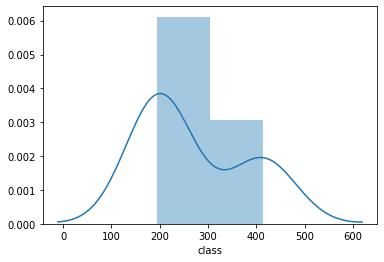

In [50]:
sns.distplot(Veh_df["class"].value_counts())

### Check for any missing values in the data 

In [51]:
Veh_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [53]:
Veh_df1=Veh_df.drop('class', axis=1)

In [55]:
Veh_df1.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [70]:
from scipy.stats import zscore
Veh_df_scale= Veh_df1.apply(zscore)
Veh_df_scale

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531
6,0.406283,-0.293543,-0.573312,0.116137,0.404751,-0.556023,-0.470734,0.129648,-0.606014,-0.337462,-0.397397,-0.441776,-0.069700,-0.856567,1.351690,-1.310052,1.792048,1.118521
7,-0.444400,-0.293543,-1.017098,-0.360128,0.404751,0.085785,-0.954676,0.899019,-0.994877,-0.130505,-0.846883,-0.898494,-0.317284,-0.722724,-0.681472,-1.085874,0.653818,0.848040
8,-0.930504,-1.758654,-1.270690,-0.866160,-0.097251,-0.342087,-1.408372,1.668390,-1.383740,-1.441236,-1.521112,-1.229615,-1.926579,-1.124255,-0.884788,0.147109,1.792048,1.659484
10,-0.930504,-1.433074,-0.763506,-0.776860,-0.097251,0.085785,-1.075662,1.155476,-0.994877,-1.234278,-1.135838,-0.984129,-1.462359,-0.856567,-0.884788,-0.301249,0.816422,0.848040
11,-0.444400,-1.758654,-1.017098,-0.985226,-0.850254,-0.556023,-1.378125,1.668390,-1.383740,-2.062109,-1.296369,-1.223906,-1.740891,-0.990411,-0.274839,1.492180,1.141631,0.848040


### K - Means Clustering

### Assign a dummy array called Cluster_error

In [77]:
cluster_errors = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [78]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=3)
  clusters.fit(Veh_df_scale)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5739.201327
4,5,5185.719333
5,6,4706.433256
6,7,4350.686420
7,8,4084.704031
8,9,3846.676599
9,10,3652.067514


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

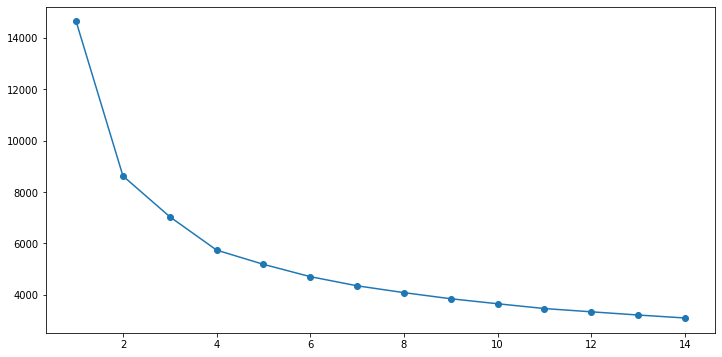

In [82]:
# Elbow plot

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

In [0]:
print(" From the above Elbow fig we can infer that optimal k Value is 4)

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [83]:
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=2)

kmeans.fit(Veh_df_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [84]:
centroids=kmeans.cluster_centers_

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [88]:
centroid_df = pd.DataFrame(centroids, columns = list(Veh_df_scale) )
centroid_df
#kmeans.labels_

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
1,-0.916833,-0.526197,-0.887660,-1.087301,-0.563172,-0.301083,-0.780130,0.867496,-0.746977,-0.490093,-0.801399,-0.784100,-0.393622,0.779115,-0.091855,-0.283968,-1.043366,-1.099425
2,-0.225338,-0.574343,-0.307614,-0.038187,0.181774,-0.172461,-0.455562,0.320123,-0.483944,-0.536606,-0.420568,-0.460233,-0.603828,-0.644323,-0.060996,0.004548,0.824842,0.707985
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


Hint: Use pd.Dataframe function 

In [96]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [97]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
Veh_df_labeled = Veh_df_scale.join(df_labels)

In [98]:
Veh_clusters = Veh_df_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=Veh_clusters.get_group(0)
df1=Veh_clusters.get_group(1)
df2=Veh_clusters.get_group(2)
df3=Veh_clusters.get_group(3)


In [99]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]
c3=kmeans.cluster_centers_[3,:]


In [102]:
I0=0
I1=0
I2=0
I3=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):  
  I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)
for i in np.arange(df2.shape[0]):  
  I3=I3+np.sum((df2.iloc[i,:-1]-c2)**2)
  

In [103]:
tot_I=I0+I1+I2+I3
print(tot_I)

27953.991153586965


### Use kmeans.labels_ function to print out the labels of the classes

In [105]:
kmeans.labels_

array([2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 0,
       2, 1, 0, 0, 1, 2, 2, 2, 0, 2, 1, 3, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0,
       2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 0,
       1, 1, 0, 1, 3, 2, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 3, 1, 2, 1, 2, 2, 0,
       1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0,
       2, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2,
       0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2,
       0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 1,
       2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1,
       2, 0, 1, 2, 3, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [106]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [121]:
Concat_df = np.concatenate([a,b,c])
Concat_df

array([[ 1.38827849e+01,  4.43850083e+00],
       [ 1.16872556e+01,  1.25098137e+00],
       [ 1.03163967e+01,  1.44934627e+00],
       [ 9.83741213e+00, -2.04197417e+00],
       [ 8.69160067e+00, -4.28977303e+00],
       [ 9.82416420e+00,  1.44459041e+00],
       [ 9.21688905e+00,  9.60681718e-01],
       [ 1.01995087e+01, -2.48089865e+00],
       [ 1.28133902e+01, -1.25677560e+00],
       [ 1.38415115e+01,  4.20915408e+00],
       [ 1.25655687e+01, -8.20998424e-01],
       [ 6.55074161e+00, -2.17824976e+00],
       [ 1.03603694e+01, -5.63362637e-01],
       [ 1.04307903e+01,  1.55400680e-01],
       [ 1.10083125e+01,  1.41729996e+00],
       [ 1.11544662e+01,  9.00239759e-01],
       [ 8.44839444e+00, -2.96866713e-01],
       [ 9.57057439e+00, -2.11788583e+00],
       [ 1.23648141e+01, -1.75653468e+00],
       [ 1.28903591e+01, -1.18477066e+00],
       [ 9.13620561e+00, -1.97538292e+00],
       [ 8.71632766e+00, -2.07810133e+00],
       [ 1.09535405e+01,  2.00257747e+00],
       [ 1.

In [122]:
Col_name= ('A','B')
Concat_df = pd.DataFrame(Concat_df, columns= Col_name)
Concat_df

,A,B
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773
5,9.824164,1.444590
6,9.216889,0.960682
7,10.199509,-2.480899
8,12.813390,-1.256776
9,13.841511,4.209154


### 10. Use scatter matrix to print all the 3 distributions

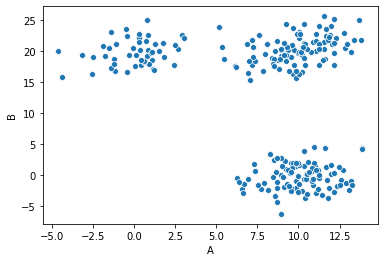

In [123]:
sns.scatterplot( x='A',y='B', data = Concat_df)

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [126]:
from sklearn.cluster import AgglomerativeClustering

In [127]:
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')

In [128]:
model2.fit(Concat_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

### 12. Plot the dendrogram for the consolidated dataframe

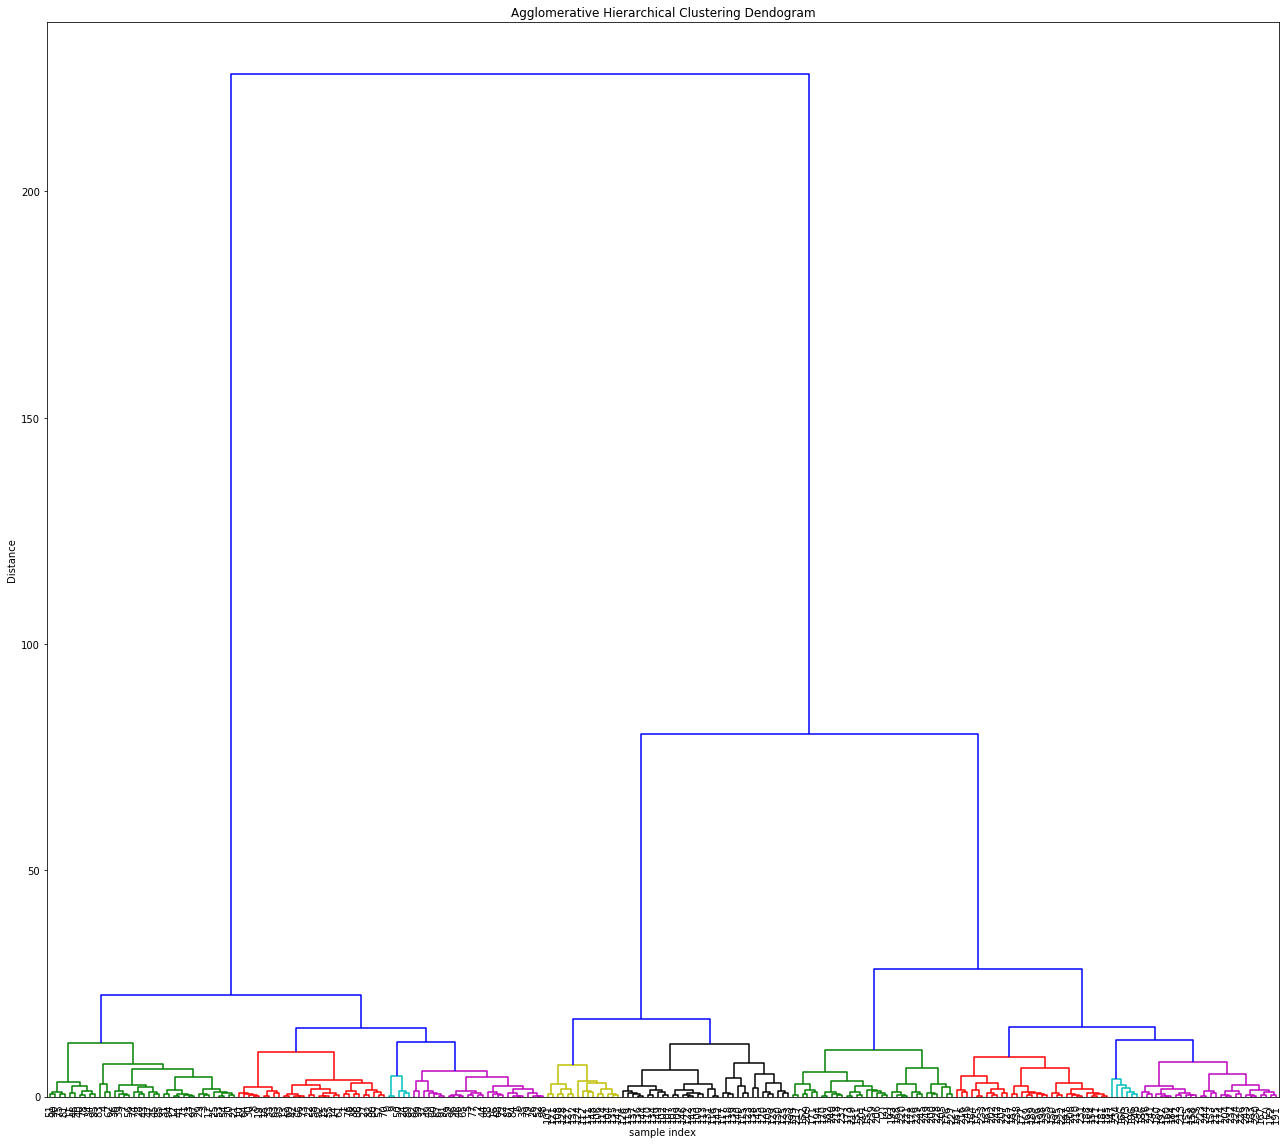

In [133]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(Concat_df, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=10,color_threshold=12,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

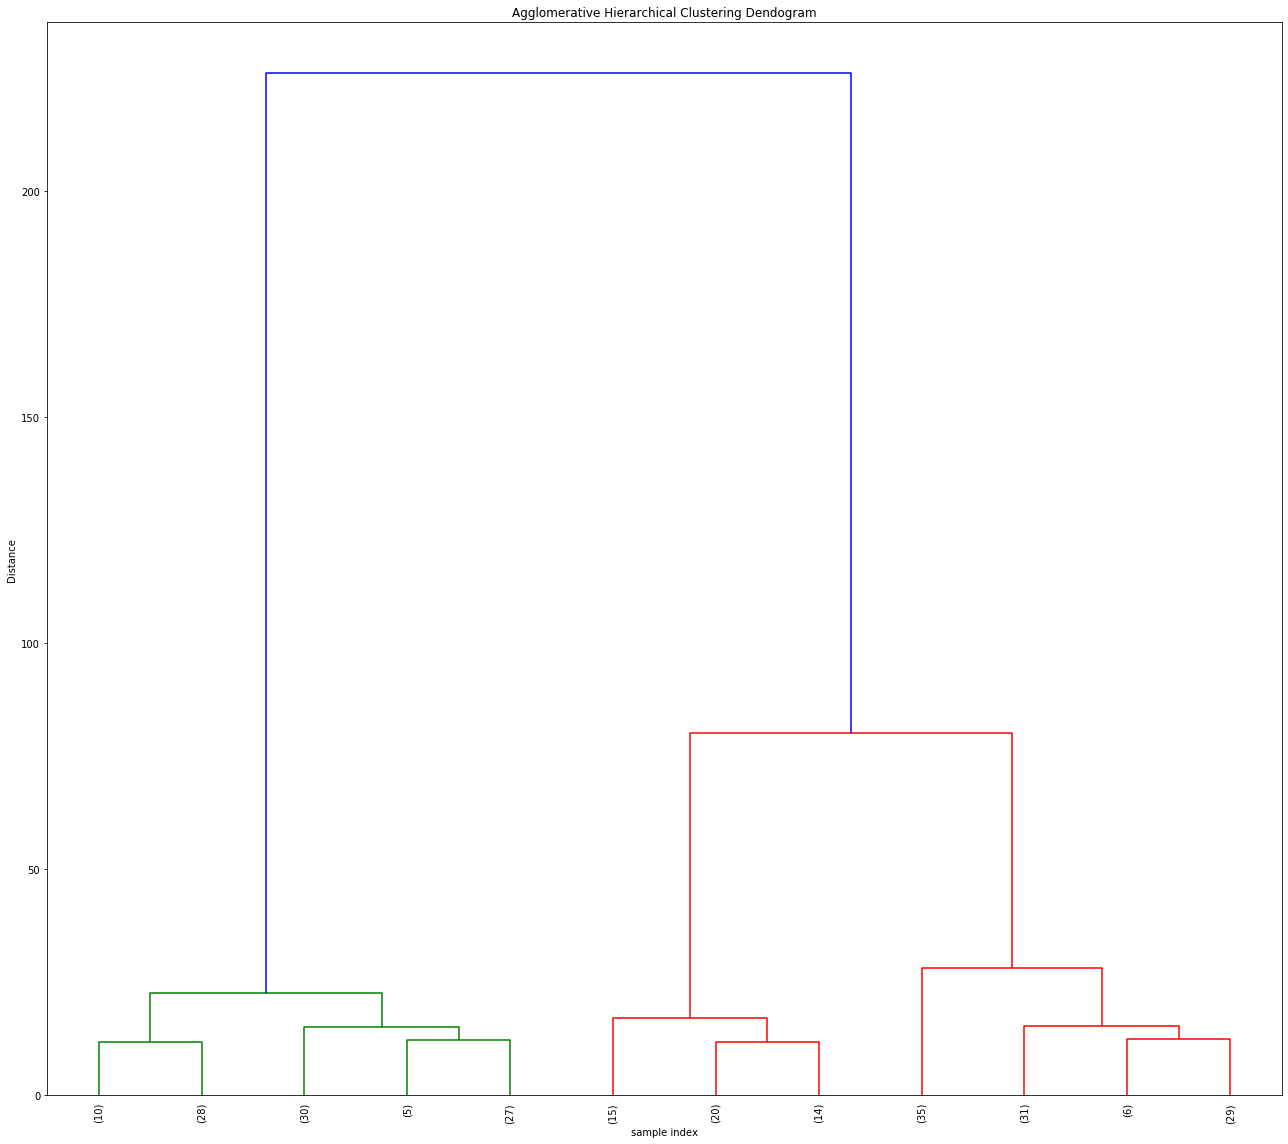

In [137]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(Concat_df, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=12,color_threshold=120,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [0]:
##From the above dendrogram we can argue that optimal distance is 50

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [145]:
from scipy.cluster.hierarchy import fcluster

In [148]:
cluster_val=fcluster(Z ,50,criterion= 'distance')
cluster_val

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

In [152]:
import numpy as np


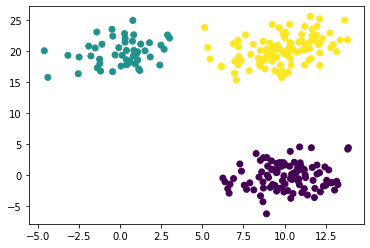

In [157]:
plt.scatter(Concat_df.iloc[:,0], Concat_df.iloc[:,1],c=cluster_val )